# Accessing and managing users

Managing accounts that will access an organization is a key aspect of a Web GIS deployment. Specific management for accounts varies depending upon a specific organization's [identity store](https://enterprise.arcgis.com/en/portal/latest/administer/linux/managing-access-to-your-portal.htm#GUID-7C7592BD-900B-49A3-87F9-CB346105308F). The API for Python provides functionality for managing user accounts. Automating management tasks such as provisioning licenses, privileges, creating and removing user accounts can save a great deal of time. The [`gis`](/python/api-reference/arcgis.gis.toc.html) module provides you with [`User`](/python/api-reference/arcgis.gis.toc.html#user) and [`UserManager`](/python/api-reference/arcgis.gis.toc.html#usermanager) classes to respresent users as objects and help you accomplish the most common tasks. 

As you might have observed, the API utilizes manager classes accessible from a [`GIS`](/python/api-reference/arcgis.gis.toc.html#gis) object through properties. For example, an instance of the [`ContentManager`](/python/api-reference/arcgis.gis.toc.html#contentmanager) class is returned when accessing the [`content`](/python/api-reference/arcgis.gis.toc.html#arcgis.gis.GIS.content) property on a `GIS` object. The `GIS` object employs a [`users`](/python/api-reference/arcgis.gis.toc.html#arcgis.gis.GIS.users) property to access the `UserManager`] class for managing operations and properties of `User` objects in the organization. This pattern of using properties to access specific manager classes is typical throughout the ArcGIS API for Python. Often times in guides and samples, these properties are chained together to decrease code complexity in accessing specific methods.

Let's explore using the API for managing `users` within a GIS organization.  For additional resources to explore options for configuring users within a Web GIS deployment and the differences inherent in using different organizational deployments, see:

* ArcGIS Enterprise - [Manage access to your portal](https://enterprise.arcgis.com/en/portal/latest/administer/linux/managing-access-to-your-portal.htm)
* ArcGIS Online - [Invite and add members](https://doc.arcgis.com/en/arcgis-online/administer/invite-users.htm)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Accessing-and-managing-users" data-toc-modified-id="Accessing-and-managing-users-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Accessing and managing users</a></span><ul class="toc-item"><li><span><a href="#About-your-account" data-toc-modified-id="About-your-account-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>About your account</a></span></li><li><span><a href="#Properties-of-a-User-object" data-toc-modified-id="Properties-of-a-User-object-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Properties of a <code>User</code> object</a></span></li><li><span><a href="#Searching-for-user-accounts" data-toc-modified-id="Searching-for-user-accounts-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Searching for user accounts</a></span></li><li><span><a href="#Creating-new-user-accounts" data-toc-modified-id="Creating-new-user-accounts-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Creating new user accounts</a></span><ul class="toc-item"><li><span><a href="#About-user-roles" data-toc-modified-id="About-user-roles-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>About user roles</a></span></li><li><span><a href="#Managing-user-roles" data-toc-modified-id="Managing-user-roles-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Managing user roles</a></span><ul class="toc-item"><li><span><a href="#Creating-new-roles" data-toc-modified-id="Creating-new-roles-1.4.2.1"><span class="toc-item-num">1.4.2.1&nbsp;&nbsp;</span>Creating new roles</a></span></li><li><span><a href="#Creating-a-user-with-a-custom-role" data-toc-modified-id="Creating-a-user-with-a-custom-role-1.4.2.2"><span class="toc-item-num">1.4.2.2&nbsp;&nbsp;</span>Creating a user with a custom role</a></span></li><li><span><a href="#Listing-all-the-custom-roles-in-an-org" data-toc-modified-id="Listing-all-the-custom-roles-in-an-org-1.4.2.3"><span class="toc-item-num">1.4.2.3&nbsp;&nbsp;</span>Listing all the custom roles in an org</a></span></li></ul></li></ul></li><li><span><a href="#Deleting-user-accounts" data-toc-modified-id="Deleting-user-accounts-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Deleting user accounts</a></span><ul class="toc-item"><li><span><a href="#Accessing-user-content" data-toc-modified-id="Accessing-user-content-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Accessing user content</a></span></li><li><span><a href="#Reassigning-user-content" data-toc-modified-id="Reassigning-user-content-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Reassigning user content</a></span></li></ul></li></ul></li></ul></div>

## About your account
Let's connect to an organization and explore properties of our user account before moving on to administering other `user` accounts. We'll import the `GIS` class from `gis` module and connect to an ArcGIS Enterprise:

In [599]:
from arcgis.gis import GIS
gis = GIS(profile="your_online_profile")

You can access your user account by accessing the `me` property as shown below:

<User username:arcgis_python>
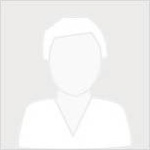

In [600]:
me = gis.users.me
me

Similar to [`Item`](/python/api-reference/arcgis.gis.toc.html#) objects, when using the Jupyter notebook IDE, you can visualize `User` objects in rich HTML representation with thumbnails and attribute information.

## Properties of a `User` object
You can query much more information about the user account as properties on the `User` object.

Consult the API [`User`](/python/api-reference/arcgis.gis.toc.html#user) class reference documentation for a complete listing of properties available on a registered account through the Python API.  In addition, the REST API [User](/rest/users-groups-and-items/user.htm#GUID-32113100-DC2C-41AA-924E-08E2CF686B00) resource documentation provides a comprehensive table of details returned in the response to a request of this resource.

Let's explore some _user_ properties:

In [601]:
me.access

'public'

You can query a `user` object's `lastLogin` property to explore when the user last connected and compare that to the `created` property to determine any actions to take on whether the account should be deleted or the account owner contacted:

In [602]:
import time
# convert Unix epoch time to local time
created_time = time.localtime(me.created/1000)
print("Created: {}/{}/{}".format(created_time[0], created_time[1], created_time[2]))

last_accessed = time.localtime(me.lastLogin/1000)
print("Last active: {}/{}/{}".format(last_accessed[0], last_accessed[1], last_accessed[2]))

Created: 2016/12/23
Last active: 2023/7/26


Let us print some more information about this account

In [603]:
print(f"Description")
print(f"{me.description}")

Description
ArcGIS Python public account.&#13;&#13;Please do not change the profile information.


In [604]:
print(f"Email{' '*12}First Name{' '*5}Last Name{' '*6}Full Name{' '*6}Level  MultiFactor{' '*4}Provider{' '*2}User Type")
print(f"\n{me.email:17}{me.firstName:15}{me.lastName:15}{me.fullName:15}{me.level:^7}{me.mfaEnabled:^15}{me.provider:10}{me.userType}")

Email            First Name     Last Name      Full Name      Level  MultiFactor    Provider  User Type

rsingh@esri.com  ArcGIS         Python         ArcGIS Python     2          0       arcgis    arcgisonly


You can determine how much storage is being used by this account

In [605]:
quota = me.storageQuota
used = me.storageUsage
pc_usage = round((used / quota)*100, 2)
print("Usage: " + str(pc_usage) + "%")

Usage: 9.04%


You can determine the groups the user is a member of:

Member of 272 groups


<Group title:"Gallery" owner:arcgis_python>
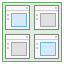

In [606]:
user_groups = me.groups
print("Member of " + str(len(user_groups)) + " groups")

# groups returned with rich HTML display in a notebook
user_groups[0]

## Searching for user accounts
The [`search()`](/python/api-reference/arcgis.gis.toc.html#arcgis.gis.UserManager.search) method on the `UserManager` class provides the means to locate specific `users` in the organization. The `query` parameter accepts standard `ArcGIS REST API` criteria to explore the full-featured text search engine of the organization.  Consult the [**Search Reference**](/rest/users-groups-and-items/search-reference.htm) for full technical details to help set expections for results and understand how the search operation behaves.  Specific [user search](/rest/users-groups-and-items/user-search.htm) documentation will also help you determine how to construct a `query` argument to satisfy your needs. To illustrate searching, let us connect as an organization administrator and search ArcGIS Online as there are many more users available there.

In [608]:
ago_gis = GIS(profile="your_online_admin_profile")

In [609]:
# search the users whose username begins with _Esri_Curator_
esri_curator_accounts = ago_gis.users.search(query="username:Esri_Curator*", max_users=25, outside_org=True)
len(esri_curator_accounts)

17

> **NOTE:** The `max_users` argument by default is set to 100 and can be modified. Responses are limited to 10,000 results per query. See Web GIS [Considerations and limitations](/rest/users-groups-and-items/considerations-and-limitations.htm) for full details. To return more than 10,000 users, create a `query` argument using search filters and append results to a list to get the entire set of results.

Each element in the list returned is a `User` object that you can query.

In [610]:
esri_curator_accounts

[<User username:Esri_Curator_Basemaps>,
 <User username:Esri_Curator_Boundaries>,
 <User username:Esri_Curator_CR>,
 <User username:Esri_Curator_Demographic>,
 <User username:Esri_Curator_DK>,
 <User username:Esri_Curator_EarthObs>,
 <User username:Esri_Curator_ES>,
 <User username:Esri_Curator_GL>,
 <User username:Esri_Curator_Historical>,
 <User username:Esri_Curator_IE>,
 <User username:Esri_Curator_Imagery>,
 <User username:Esri_Curator_KR>,
 <User username:Esri_Curator_Landscape>,
 <User username:Esri_Curator_Oceans>,
 <User username:Esri_Curator_SR>,
 <User username:Esri_Curator_Transport>,
 <User username:Esri_Curator_Urban>]

<User username:Esri_Curator_Basemaps>
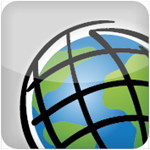

In [611]:
esri_curator_accounts[0]

Once you know a user's `username`, you can access that object using the [**`get()`**](/python/api-reference/arcgis.gis.toc.html#arcgis.gis.UserManager.get) method. Let us access the Esri curator account for historical maps

<User username:Esri_Curator_Historical>
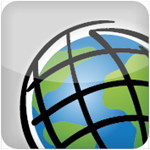

In [612]:
esri_curator_bmaps = ago_gis.users.get(username='Esri_Curator_Historical')
esri_curator_bmaps

## Creating new user accounts
You can add new users to an organization with two `UserManager` methods, [`signup()`](/python/api-reference/arcgis.gis.toc.html#arcgis.gis.UserManager.signup) or [`create()`](/python/api-reference/arcgis.gis.toc.html#arcgis.gis.UserManager.create). The `signup()` method **only** works for adding built-in accounts to an ArcGIS Enterprise deployment. It will not work with an organization deployed on ArcGIS Online. Unlike the `create()` method, `signup()` does not require administrator privileges. 

> Note, you can disable self-signup in your ArcGIS Enterprise which would render the `signup()` unusable if you want to configure organization access in an invite-only manner.

You need administrator privileges to call the `create()` method. With an `ArcGIS Enterprise` administrator account, you can use this method to add both built-in user accounts (provider="_arcgis_") and organization-specific identity store accounts (provider=_"enterprise"_). For an ArcGIS Online organization, you can only create users that use the built-in credential store. For built-in accounts, you provide an explicit password when the account is created, which the `user` can subsequently change upon login. For enterprise accounts using your organization-specific identiy store credentials, you can ignore the `password` parameter and your users will authenticate through that identity store. See the [understanding identity stores](https://enterprise.arcgis.com/en/portal/latest/administer/windows/managing-access-to-your-portal.htm#GUID-7C7592BD-900B-49A3-87F9-CB346105308F) documentation for details on configuring an organization for access.

What any new user can do is based upon the [`privileges`](https://doc.arcgis.com/en/arcgis-online/administer/privileges-for-roles-orgs.htm) assigned through the [`role`](https://doc.arcgis.com/en/arcgis-online/administer/member-roles.htm) and [`user type`](https://doc.arcgis.com/en/arcgis-online/administer/user-types-orgs.htm) arguments of the `create()` operation. See the [User types, roles, and privileges](https://doc.arcgis.com/en/arcgis-online/administer/roles.htm) documentation for detailed descriptions on how these elements work together. A set of _privileges_ is assigned to a _role_, and then based upon those privileges a role will be compatible with certain _user_types_. Together these values determine what tasks and workflows a user can perform in an organization.

The `user_type` and `role` arguments are required when running the method unless they have been configured through new member defaults. See the [Configure new member defaults](https://enterprise.arcgis.com/en/portal/latest/administer/windows/configure-new-member-defaults.htm) documentation for detailed instructions on how to set these values. The `UserManager` provides the [`user_settings`](/python/api-reference/arcgis.gis.toc.html#arcgis.gis.User.user_settings) property which allows administrators to both get and set these default values.

Let us look at some examples of creating users:

### Create user using _new member default_ values

The `ago_gis` connection currently represents a default administrator role connecting to ArcGIS Online. Let's first examine whether _New member defaults_ have been configured:

In [613]:
new_member_defaults = ago_gis.users.user_settings
new_member_defaults

{'role': 'org_publisher',
 'userLicenseType': 'advancedUT',
 'groups': ['96c9a826e654481ba2cf8f6d04137b32'],
 'userType': 'arcgisonly',
 'apps': [],
 'appBundles': [],
 'categories': []}

> **Note:** The `userLicenseType` key refers to the _user_type_ parameter, and the `userType` key refers to the _provider_ parameter.

In [614]:
# Create an ArcGIS Online account using `New Member Defaults`
demo_user1 = ago_gis.users.create(username = 'new_uq_user_A9b4K1',
                                  password = 'Ready4W8bGI$',
                                  firstname = 'demo',
                                  lastname = 'user',
                                  email = 'python@esri.com',
                                  description = 'Demonstrating how to create users using ArcGIS Python API')

In [615]:
demo_user1

<User username:new_uq_user_A9b4K1>

We can examine that the new user has been assigned the default values:

In [616]:
print(f"New user: {demo_user1.username}\n{'-'*50}")
print(f"{' '*2}role:{' '*10}{demo_user1.role}")
print(f"{' '*2}user type:{' '*5}{demo_user1.userLicenseTypeId}")

New user: new_uq_user_A9b4K1
--------------------------------------------------
  role:          org_publisher
  user type:     advancedUT


> **Note:** We did not enter a value for the _provider_ argument but rather accepted the default `arcgis` because the organization we're connected to utilizes built-in user security. If we were creating accounts for an organization employing an organization-specific identity store, we would specify the _provider_ argument as `enterprise` and enter an  _idpUsername_ argument as well to specify the account's username within that credential store. To learn more about this configuration, refer to this [Understand identity stores](https://enterprise.arcgis.com/en/portal/latest/administer/windows/about-configuring-portal-authentication.htm#ESRI_SECTION1_83F7B85FEF594A6B96997AF3CADF3D38) help topic.

## More about user roles
We briefly discussed how to determine what a _user_ can do within an organization in a preceding paragraph when we talked about [user types, roles, and privileges](https://doc.arcgis.com/en/arcgis-online/administer/roles.htm). Specifically, the [member roles](https://enterprise.arcgis.com/en/portal/latest/administer/windows/member-roles.htm) define a set of privileges. The _role_ can then be assigned to a _user_ as we've demonstrated above. An organization provides _default roles_ upon installation or subscription activation. See

* [ArcGIS Online Default roles](https://doc.arcgis.com/en/arcgis-online/administer/member-roles.htm#ESRI_SECTION1_C30D73392D964D51A8B606128A8A6E8F)
* [ArcGIS Enterprise Default roles](https://enterprise.arcgis.com/en/portal/latest/administer/windows/member-roles.htm#ESRI_SECTION1_C30D73392D964D51A8B606128A8A6E8F)

These default roles are configured with a set of privileges that cannot be changed. Depending upon the needs and security of your organization, you can however create [custom roles](https://doc.arcgis.com/en/arcgis-online/administer/member-roles.htm#ESRI_SECTION1_30C4E874B2A94ACFBDCC0F13400E5B4E). Depending upon the organizational deployment type, you may choose to use [ArcGIS Online templates](https://doc.arcgis.com/en/arcgis-online/administer/configure-roles.htm#ESRI_SECTION1_98A9741612744BAF9F169D255E5B6AEB) or [ArcGIS Enterprise templates](https://enterprise.arcgis.com/en/portal/latest/administer/windows/configure-roles.htm#ESRI_SECTION1_98A9741612744BAF9F169D255E5B6AEB) as a starting point for other roles, or construct specialized roles from scratch based on what your organization wants users to accomplish. 

To see the role for any `User` object, you can query the `role` property as previously seen:

In [617]:
demo_user1_role = demo_user1.role
print(type(demo_user1_role))
print(demo_user1_role)

<class 'str'>
org_publisher


Since this user was created with a built in role specified as a string, we get back a string with value `org_publisher`.

### Creating a new role
Let's create a new _role_ in the organization. Use the [`create()`](/python/api-reference/arcgis.gis.toc.html#arcgis.gis.RoleManager.create) method on the [`RoleManager`](/python/api-reference/arcgis.gis.toc.html#rolemanager) class for this task. Specifically, we want a _role_ to assign to _users_ who we want to only publish tile layers. The _role_ should have a subset of _privileges_ of the default _User_ role and be able to create items, publish tile layers, join groups, and view and share items to the organization. This role will not have any administrator privileges. Let's demonstrate how to create a role.  In order to assign _privileges_ to a role, let's examine the exact syntax format for individual _privileges_ using the privileges property on our _user_ object:

> **Note:** Even though _privileges_ is not technically a property of the `User` class, once a _user_ object is initialized, the individual _privileges_ from the _role_ hydrate the _user_ object. 

To use the API to set privileges, we need to know the syntax of an individual _privilege_. Each privilege will follow this basic structure:

`*:<role>:*`

For example, the user _privilege_ to create and manage their own groups is called `portal:user:createGroup`. As noted above, you can observe the specific _privileges_ of a user by querying the `privileges` property. For the `demo_user1` user we created above, we can see a sample of the syntax for the privileges from the role assigned to that user by looking at the first 10 privilges:

In [618]:
demo_user1.privileges[:10]

['features:user:edit',
 'portal:publisher:bulkPublishFromDataStores',
 'portal:publisher:createDataPipelines',
 'portal:publisher:publishDynamicImagery',
 'portal:publisher:publishFeatures',
 'portal:publisher:publishKnowledgeGraph',
 'portal:publisher:publishScenes',
 'portal:publisher:publishServerServices',
 'portal:publisher:publishTiledImagery',
 'portal:publisher:publishTiles']

For the custom role we want to create, we'll construct a list of specific privileges to provide the ability to publish tile layers, join and create a _group_ as well as view and share items in the organization. We'll then create a new role called `tiles_publisher` in the organization.

**Note**: the `privileges` parameter was provided a list of strings specifying each individual privilege. Refer to the [`privileges` property](/python/api-reference/arcgis.gis.toc.html#arcgis.gis.Role.privileges) on the `Role` class to see a comprehensive list of possible privileges.

In [631]:
# create a tiles publisher role
privilege_list = ["portal:publisher:publishTiles",
                  "portal:user:createItem",
                  "portal:user:joinGroup",
                  "portal:user:viewOrgGroups",
                  "portal:user:viewOrgItems",
                  "portal:user:shareToGroup",
                  "portal:user:shareToOrg",
                  "portal:user:createGroup",
                  "portal:user:shareGroupToOrg"
                 ]

tiles_pub_role = ago_gis.users.roles.create(name = 'tiles_publisher',
                                            description = 'User that can publish tile layers',
                                            privileges = privilege_list)

tiles_pub_role

<Role name: tiles_publisher, description: User that can publish tile layers>

In [632]:
# inspect the privileges of this role
tiles_pub_role.privileges

['portal:publisher:publishTiles',
 'portal:user:createGroup',
 'portal:user:createItem',
 'portal:user:joinGroup',
 'portal:user:shareToGroup',
 'portal:user:shareToOrg',
 'portal:user:shareGroupToOrg,
 'portal:user:viewOrgGroups',
 'portal:user:viewOrgItems']

### Creating a user with values other than new member defaults
Let's first return a list of possible values we can enter in for the _user_type_ argument. The [`license_types`](/python/api-reference/arcgis.gis.toc.html#arcgis.gis.UserManager.license_types) property on the `UserManager` returns a dictionary with comprehensive information about each license type. We're only interested in the specific `id` value so we'll use a list comprehension to return a list of possble values to use as _user_type_ arguments:

In [633]:
usr_types = [ut['id'] for ut in ago_gis.users.license_types]
usr_types

['advancedUT',
 'basicUT',
 'creatorUT',
 'editorUT',
 'fieldWorkerUT',
 'GISProfessionalAdvUT',
 'GISProfessionalBasicUT',
 'GISProfessionalStdUT',
 'IndoorsUserUT',
 'insightsAnalystUT',
 'liteUT',
 'standardUT',
 'storytellerUT',
 'viewerUT']

### Listing all the custom roles in an org
Next, let's inspect the possible values we can use for the _role_ argument. The default Administrator, Publisher, and User roles (see [Default roles](https://doc.arcgis.com/en/arcgis-online/administer/member-roles.htm#ESRI_SECTION1_C30D73392D964D51A8B606128A8A6E8F) for descriptions) are available by using `org_admin`, `org_publisher`, or `org_user` values as `role` arguments. To assign other default roles or [custom roles](https://doc.arcgis.com/en/arcgis-online/administer/member-roles.htm#ESRI_SECTION1_30C4E874B2A94ACFBDCC0F13400E5B4E), the values to use for the `role` argument are the `role_id` values returned from the [`all()`](/python/api-reference/arcgis.gis.toc.html#arcgis.gis.RoleManager.all) method of the `RoleManager` class. We can access a `RoleManager` object using the [`roles`](/python/api-reference/arcgis.gis.toc.html#arcgis.gis.UserManager.roles) property on the `UserManager`:

In [639]:
role_mgr = ago_gis.users.roles
print(f"Role:{' '*20}Role_id{' '*14}\n{'-'*21}{' '*4}{'-'*16}")
for role in role_mgr.all():
    print(f"{role.name:24} {role.role_id:22}")

Role:                    Role_id              
---------------------    ----------------
Viewer                   iAAAAAAAAAAAAAAA      
Data Editor              iBBBBBBBBBBBBBBB      
Facilitator              iCCCCCCCCCCCCCCC      
Analyst                  53JTWAmyPz3MLgwl      
role_6f33c               8MueSvFrA35xyg5p      
AGOLImageryAnalysis      bl8ksdIBpwV4pa1N      
AllNotebookPrivileges    cMH6sh9YL5RNFtat      
UC2018_GEOG471           DmZ9fQYjofiNtJWn      
tiles_publisher          gBC4ANXsKok12Lm4      
guest_notebooks_basic    o4mDG5PEwU2y7tlv      
advanced notebooks       PAH6xJAmWgYuF2vX      


We can see the `role_id` value for the custom role we created. Let's use that id to create a new user and assign that user to this new role:

In [697]:
tiles_pub_user = ago_gis.users.create(username='tiles_publisher_1',
                                      password = 'b0cb0c9f63e',
                                      firstname = 'Tiles',
                                      lastname = 'Publisher',
                                      email = 'python@esri.com',
                                      description = 'Custom role, can only publish tile layers',
                                      role = 'gBC4ANXsKok12Lm4',
                                      user_type='GISProfessionalAdvUT')

tiles_pub_user

<User username:tiles_publisher_1>

Querying the `privileges` property of a `User` object returns a list of strings with fine grained privileges. When creating a `Role` object, you can pick and choose from this or refer to the [api ref doc](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.Role.privileges).

In [698]:
tiles_pub_user.privileges

['portal:publisher:publishTiles',
 'portal:user:createGroup',
 'portal:user:createItem',
 'portal:user:joinGroup',
 'portal:user:shareToGroup',
 'portal:user:viewHostedFeatureServices',
 'portal:user:viewOrgGroups',
 'portal:user:viewOrgItems']

Querying the `roleId` property of a `User` returns you the custom roles' ID. You can use this to search for that role to know more details or create another user with the same role:

In [699]:
tiles_pub_user.roleId

'gBC4ANXsKok12Lm4'

In [700]:
searched_role = gis.users.roles.get_role(tiles_pub_user.roleId)
searched_role.description

'User that can publish tile layers'

## Deleting user accounts
Provided you are logged in as an administrator, you can delete user accounts by calling the [`delete()`](/python/api-reference/arcgis.gis.toc.html#arcgis.gis.User.delete) method on a `User` object.

> **Note:** You can also use the [`delete_users()`](/python/api-reference/arcgis.gis.toc.html#arcgis.gis.UserManager.delete_users) method in the [`arcgis.gis.admin`](/python/api-reference/arcgis.gis.admin.html) submodule to delete a list of users.

The Web GIS prevents you from deleting users if they own [`items`](/python/api-reference/arcgis.gis.toc.html#item) and/or [`groups`](/python/api-reference/arcgis.gis.toc.html#group). It is important to query a _user_ to investigate whether they own content.

### Accessing user content
As an _administrator_, you can view the _folders_ and _items_ owned by any user. Get the `User` object and then query the [`items()`](/python/api-reference/arcgis.gis.toc.html#arcgis.gis.User.items) method and  [`folders`](/python/api-reference/arcgis.gis.toc.html#arcgis.gis.User.folders) property.

In [702]:
pub1_user = ago_gis.users.get("publisher1_uq")

#### List the folders owned by a user

In [703]:
publisher_folder_list = pub1_user.folders

In [704]:
publisher_folder_list

[{'username': 'publisher1_uq',
  'id': '01bf52ddd49b45caa9c5a6ef263d8352',
  'title': 'Arkansas data',
  'created': 1690416367000},
 {'username': 'publisher1_uq',
  'id': 'b73d3fd029a14fcda72ba1af8fdbdd3c',
  'title': 'chicago_data',
  'created': 1690415221000},
 {'username': 'publisher1_uq',
  'id': 'ff046ef454c04788b53b96261d5803ef',
  'title': 'historical_data',
  'created': 1690415732000}]

#### List the content in a user's root folder

In addition to folder a user may have created, each user also has a root folder that contains those items that have not been explicitly added to a folder:

In [705]:
publisher1_root_folder_items = pub1_user.items()
print("Total number of items in root folder: " + str(len(publisher1_root_folder_items)))

#access the first item for a sample
publisher1_root_folder_items[0]

Total number of items in root folder: 3


<Item title:"Colorado Mountain Peaks" type:Shapefile owner:publisher1_uq>

In [706]:
# list all items for the user
print(f"Root folder: {pub1_user.username}")
print(f" Item Title{' '*22}Item Type{' '*16}\n {'-'*27}{' '*5}{'-'*25}")
for root_item in publisher1_root_folder_items:
    print(f" {' '*1}{root_item.title:31}{root_item.type:25}")
print("\n")
for pub_folder in publisher_folder_list:
    print(f"Folder: {pub_folder['title']}")
    print(f" Item Title{' '*22}Item Type{' '*16}\n {'-'*27}{' '*5}{'-'*25}")
    for folder_item in pub1_user.items(folder=pub_folder['title']):
        print(f" {' '*1}{folder_item.title:31}{folder_item.type:25}")
    print("\n")

Root folder: publisher1_uq
 Item Title                      Item Type                
 ---------------------------     -------------------------
  Colorado Mountain Peaks        Shapefile                
  Colorado Mountain Peaks        Feature Service          
  World Country Boundary Data    Service Definition       


Folder: Arkansas data
 Item Title                      Item Type                
 ---------------------------     -------------------------
  AR Boundaries                  Shapefile                
  AR Boundaries                  Feature Service          


Folder: chicago_data
 Item Title                      Item Type                
 ---------------------------     -------------------------
  Chicago Accidents              CSV                      
  Chicago Accidents              Feature Service          
  Chicago Accidents Volume2      CSV                      
  Chicago Accidents Volume2      Feature Service          


Folder: historical_data
 Item Title    

As an administrator within an organizaion, you are able to query the contents of another user without knowing that user's password or logging in as that user.

### Reassigning user content
When the time comes to delete a user account, you can filter these items and choose to preserve some and delete the content that is no longer needed. We're going to delete the `publisher1_uq` account we've just looked at, keeping only some accident data we plan to analyze later.

> **Note:** It is import to consider the _privileges_ of each _user_. If the receiving _user_ does not have the proper permissions to be reassigned an item, errors may occur. 

> **Note:** If an item's sharing level is _private_ but shared with _groups_, the receiving _user_ must have the appropriate sharing access to all groups the item is shared with.

We'll reassign the source [`Feature Layer`](/python/api-reference/arcgis.features.toc.html#featurelayer) items about accidents in Chicago to the `tiles_pub_user` user we created earlier. We'll use the [`advanced_search()`](/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ContentManager.advanced_search) method to query for specific item titles and types, and reassign these items. You can reassign specific items to another user by calling the [`reassign_to()`](/python//api-reference/arcgis.gis.toc.html#arcgis.gis.Item.reassign_to) method on the `Item` object. 

In [707]:
chi_flyr_items = ago_gis.content.advanced_search(query=f"owner:{pub1_user.username} title:Chicago type:Feature Service", )["results"]
chi_flyr_items

[<Item title:"Chicago Accidents" type:Feature Layer Collection owner:publisher1_uq>,
 <Item title:"Chicago Accidents Volume2" type:Feature Layer Collection owner:publisher1_uq>]

In [709]:
for flyr_item in chi_flyr_items:
        flyr_item.reassign_to(target_owner=tiles_pub_user)

Let's now query the _tiles_pub_user_ to verify the items were successfully assigned.

In [710]:
tiles_pub_user.items()

[<Item title:"Chicago Accidents" type:CSV owner:tiles_publisher_1>,
 <Item title:"Chicago Accidents" type:Feature Layer Collection owner:tiles_publisher_1>,
 <Item title:"Chicago Accidents Volume2" type:CSV owner:tiles_publisher_1>,
 <Item title:"Chicago Accidents Volume2" type:Feature Layer Collection owner:tiles_publisher_1>]

Notice how the _related_items_ for the Feature Layer are automatically assigned as part of the operation.

### Delete user and reassign items

Now we are left with a few more items which we want to reassign to a _user_ named `arcgis_python` in our organization. We can call the `reassign_to()` method of the `User` object or we can call the [`delete()`](/python/api-reference/arcgis.gis.toc.html#arcgis.gis.User.delete) method on the `User` object and provide an argument to the `reassign_to` parameter to accomplish the same task. First let's take a look at the remaining items owned by the `publisher1_uq` _user_:

In [711]:
ago_gis.content.advanced_search(query=f"owner:{pub1_user.username}")

{'total': 7,
 'start': 1,
 'num': 100,
 'nextStart': -1,
 'results': [<Item title:"Ancient Woodland Inventory UK" type:Feature Layer Collection owner:publisher1_uq>,
  <Item title:"Ancient Woodland Inventory UK" type:Shapefile owner:publisher1_uq>,
  <Item title:"AR Boundaries" type:Feature Layer Collection owner:publisher1_uq>,
  <Item title:"AR Boundaries" type:Shapefile owner:publisher1_uq>,
  <Item title:"Colorado Mountain Peaks" type:Shapefile owner:publisher1_uq>,
  <Item title:"Colorado Mountain Peaks" type:Feature Layer Collection owner:publisher1_uq>,
  <Item title:"World Country Boundary Data" type:Service Definition owner:publisher1_uq>]}

> **Note:** The `advanced_search()` method searches all folders owned by a _user_. When using the `reassign_to` parameter in the `delete()` method, the output items are stored in folders named after the original _username_ followed by the _folder title_, including a folder named _username_root_ for items that are stored in the original user's root folder.

Now we'll use the `delete()` method to remove the `publisher1_uk` user while reassigning their items:

In [712]:
pub1_user.delete(reassign_to='arcgis_python')

True

We'll search for the user to verify the deletion:

In [713]:
ago_gis.users.advanced_search(query=f"owner:{pub1_user.username}")

{'total': 0, 'start': 1, 'num': 10, 'nextStart': -1, 'results': []}

Thus, we have successfully deleted a user after taking care of that user's content.